### Practica 09- Orlando Méndez Montes

### Sistema de Recomendaciones Netflix

##### Importación de todas las librerías necesarias para análisis de datos y visualización

In [4]:
import numpy as np  # Para manejar arreglos y operaciones numéricas de forma eficiente.

import pandas as pd  # Herramienta útil para cargar, manipular y analizar datos en tablas (tipo Excel).

import matplotlib.pyplot as plt  # Sirve para hacer gráficos tipo línea, barras, dispersión, etc. Muy visual.

import seaborn as sns  # Librería basada en matplotlib, pero con gráficos más bonitos y fáciles de usar.

import warnings
warnings.filterwarnings("ignore")  # Oculta las advertencias para que no saturen la salida.


In [5]:
netflix_dataset = pd.read_csv("netflix_dataset.csv")  # Abrimos el archivo CSV con los datos de Netflix

netflix_dataset.head()  # Mostramos las primeras 5 filas para echar un vistazo rápido

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Contar valores únicos en cada columna para entender la distribución
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict, index=["unique count"]).transpose())

# Verificar valores faltantes en el dataset
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769
Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


##### 3:Análisis Exploratorio de Datos
##### Descripción: Análisis de la distribución entre películas y series de TV en Netflix.

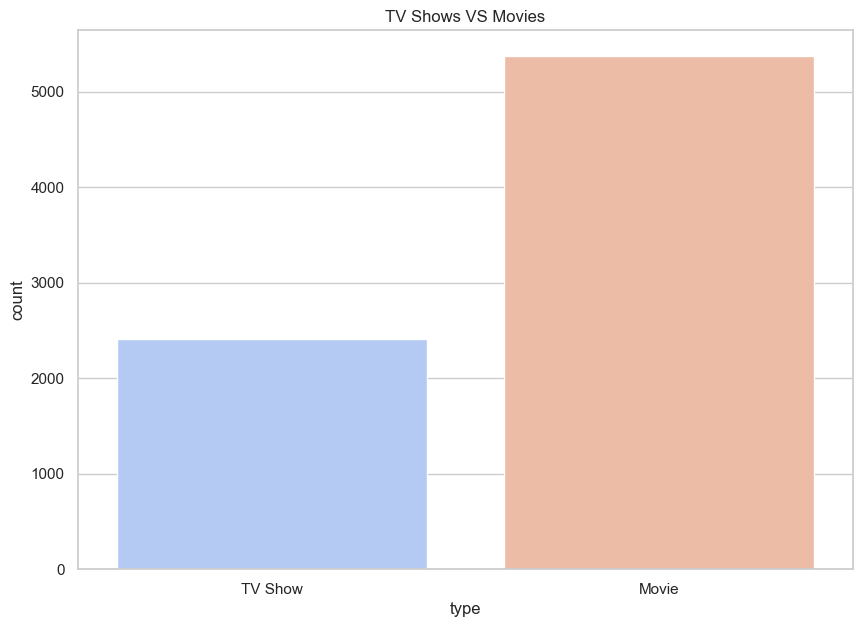

In [6]:
# Separamos el dataset en dos: uno para las series y otro para las películas
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Creamos un gráfico de barras para comparar cuántas películas y series hay
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_dataset, palette="coolwarm")  # cambié los colores a 'coolwarm'
ax.set_title("TV Shows VS Movies")
plt.show()


Análisis Temporal: Mejor Mes para Lanzar Contenido
Descripción: Análisis de cuándo se agrega más contenido a Netflix para identificar oportunidades de lanzamiento.

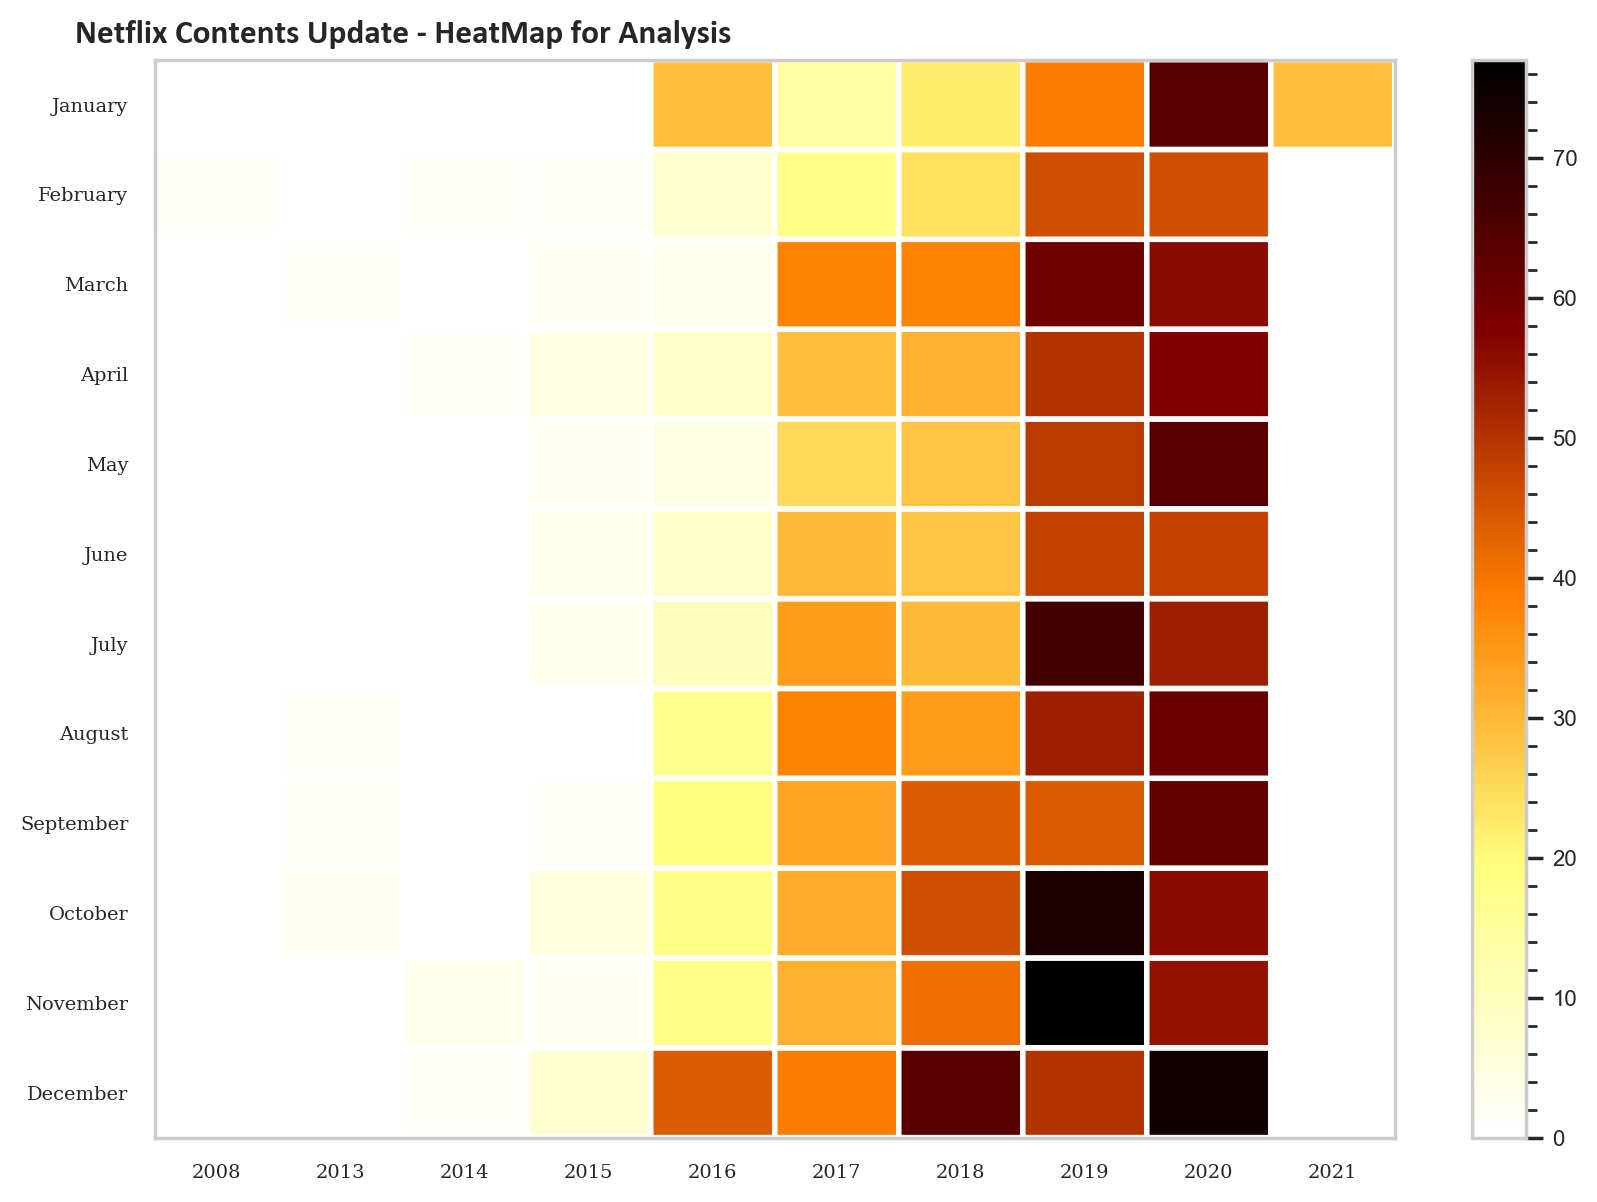

In [8]:
# Análisis temporal del contenido agregado por mes y año
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

# Definir orden de meses para el heatmap
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# Crear matriz de contenido por año y mes
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Crear heatmap para visualizar patrones temporales
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', 
          fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Análisis de Clasificaciones (Ratings)
Descripción: Análisis de las clasificaciones más comunes en el contenido de Netflix.

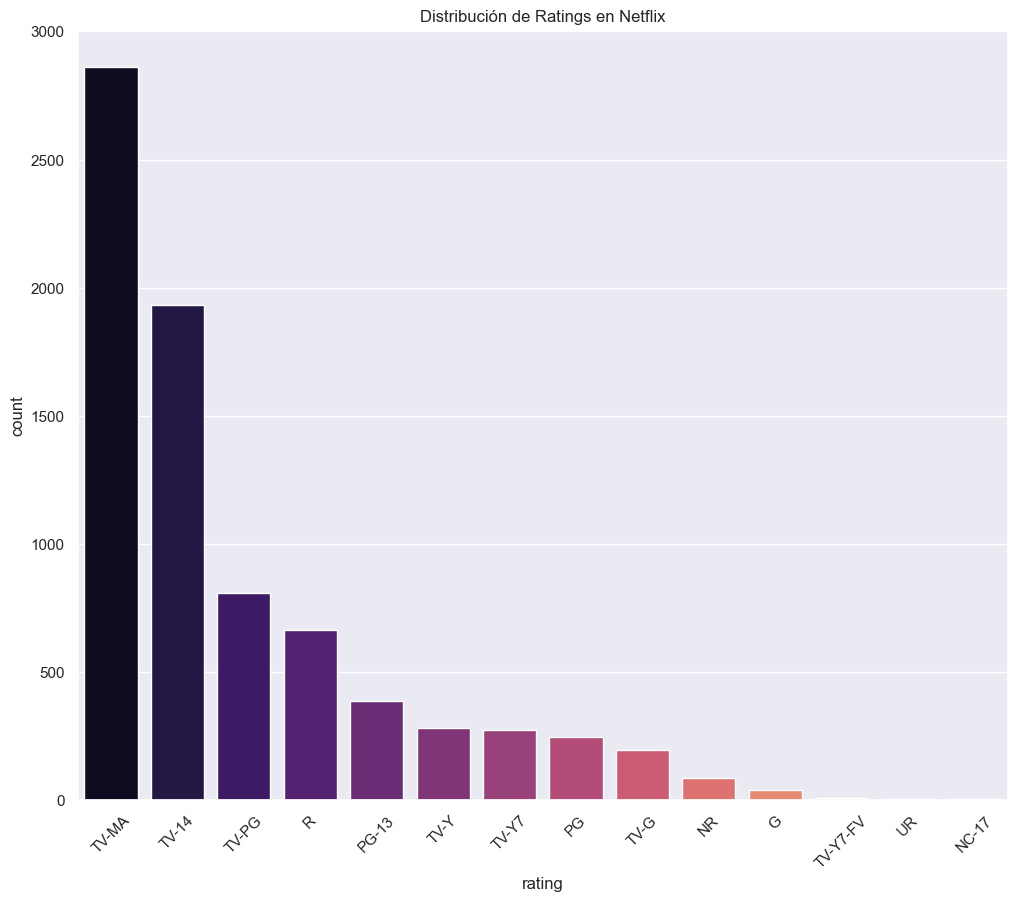

In [7]:
# Analizamos cómo están distribuidos los distintos ratings en el contenido de Netflix
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")
ax = sns.countplot(
    x="rating",
    data=netflix_dataset,
    palette="magma",  # cambiamos los colores de 'Set1' a 'magma' para un look más intenso
    order=netflix_dataset['rating'].value_counts().index[0:15]
)
plt.xticks(rotation=45)  # Giramos las etiquetas del eje X para que no se encimen
plt.title("Distribución de Ratings en Netflix")
plt.show()


#### 4: Análisis con Datos de IMDB
Descripción: Integración de ratings de IMDB para identificar el contenido mejor valorado disponible en Netflix.

In [9]:
# Cargar datos de ratings y títulos de IMDB
imdb_ratings = pd.read_csv('IMDb ratings.csv', 
                          usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', 
                         usecols=['title', 'year', 'genre'])

# Crear un nuevo DataFrame con título y rating
ratings_simple = pd.DataFrame({
    'Title': imdb_titles['title'],
    'Rating': imdb_ratings['weighted_average_vote']
})

# Mostrar el nuevo dataset
print(ratings_simple.head())

# Crear DataFrame combinado con información de IMDB
ratings = pd.DataFrame({
    'Title': imdb_titles.title,
    'Release Year': imdb_titles.year,
    'Rating': imdb_ratings.weighted_average_vote,
    'Genre': imdb_titles.genre
})

# Eliminar duplicados
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)
print(f"Forma del dataset de ratings: {ratings.shape}")

# Limpiar valores nulos
ratings.dropna()

# Hacer join entre datos de IMDB y Netflix para obtener contenido común
joint_data = ratings.merge(netflix_dataset, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

# Visualizar top 10 películas mejor valoradas en Netflix
import plotly.express as px
top_rated = joint_data[0:10]
fig = px.sunburst(
    top_rated,
    path=['title', 'country'],
    values='Rating',
    color='Rating'
)
fig.show()

# Análisis de países que más contenido crean
country_count = joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
topcountries = country_count[0:11]
print("Top países creadores de contenido:")
print(topcountries)

                         Title  Rating
0                   Miss Jerry     5.9
1  The Story of the Kelly Gang     6.1
2               Den sorte drøm     5.8
3                    Cleopatra     5.2
4                    L'Inferno     7.0
Forma del dataset de ratings: (85852, 4)


Top países creadores de contenido:
                               count
country                             
United States                    799
India                            702
United Kingdom                   107
Canada                            56
Philippines                       50
Spain                             40
South Korea                       36
Indonesia                         35
France                            33
United Kingdom, United States     31
Australia                         30


#### 5:Análisis Temporal por Años
Descripción: Análisis de la evolución del contenido de Netflix en los últimos 15 años.

In [11]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


In [12]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Contenido de los últimos 15 años: (7042, 12)


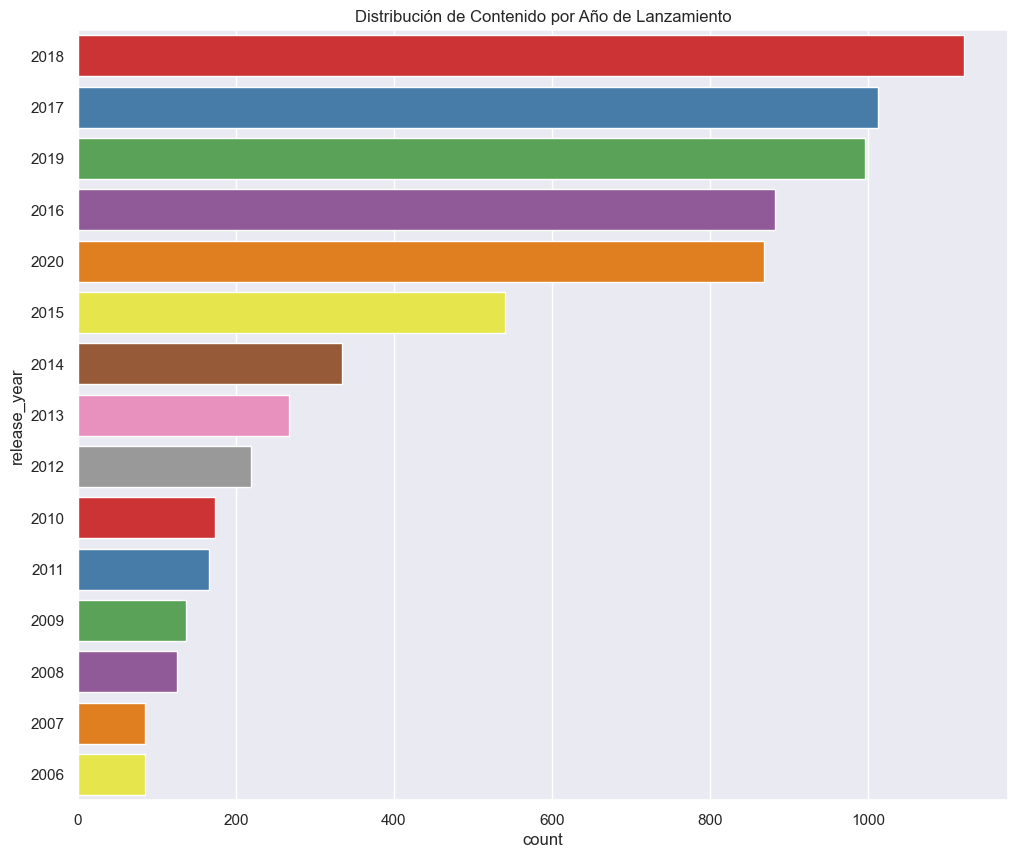

In [13]:
# Filtrar contenido de los últimos 15 años
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year'] > 2005]
print(f"Contenido de los últimos 15 años: {Last_fifteen_years.shape}")

# Visualizar distribución por año de lanzamiento
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", 
                   order=netflix_dataset['release_year'].value_counts().index[0:15])
plt.title("Distribución de Contenido por Año de Lanzamiento")
plt.show()

### =============================================================================

#### 6:Análisis Específico de TV Shows
Descripción: Análisis detallado de las series de TV, incluyendo países de origen y duración.

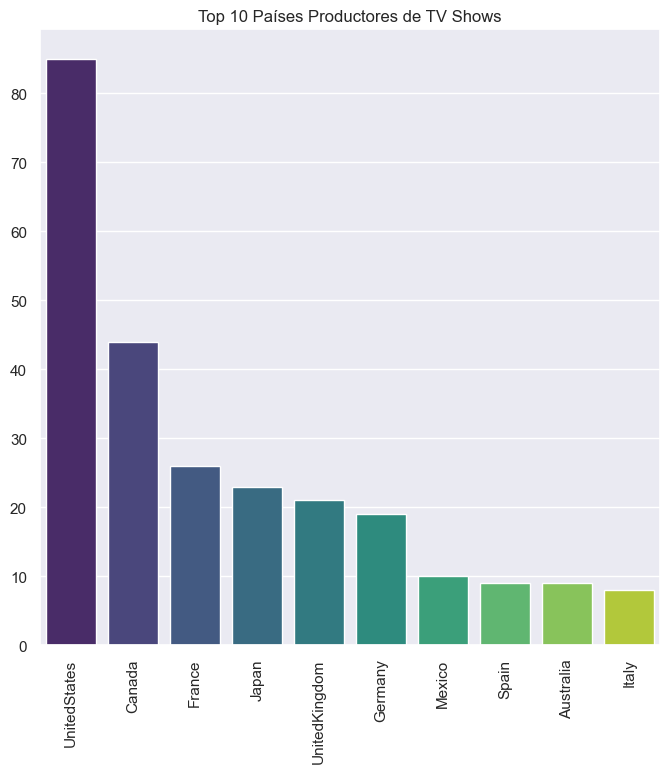

In [12]:
# Analizamos de qué países provienen las series de TV
countries = {}
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')  # Rellenamos valores nulos con 'Unknown'
cou = list(netflix_shows['country'])

# Recorremos la lista para contar los países (algunos títulos tienen más de un país)
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

# Limpiamos los nombres de los países (quitamos espacios)
countries_fin = {}
for country, no in countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

# Ordenamos los países de mayor a menor según la cantidad de series
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}

# Mostramos los 10 países que más series producen
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    x=list(countries_fin.keys())[0:10],
    y=list(countries_fin.values())[0:10],
    palette="viridis"  # paleta de colores cambiada para algo más moderno y vistoso
)
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation=90)
plt.title("Top 10 Países Productores de TV Shows")
plt.show()


### ============================================================

#### 7:Análisis de Duración de Películas
Descripción: Análisis de la distribución de duración de las películas en Netflix.

In [16]:

# Procesar duración de películas (remover texto y convertir a números)
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)

netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

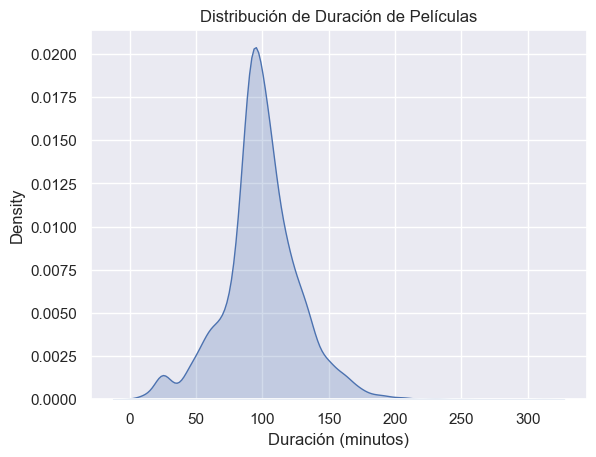

In [17]:
# Crear gráfico de densidad para visualizar distribución de duraciones
sns.set(style="darkgrid")
ax = sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title("Distribución de Duración de Películas")
plt.xlabel("Duración (minutos)")
plt.show()

#### 8:Análisis de Duración de TV Shows
Descripción: Análisis del número de temporadas de las series de TV.

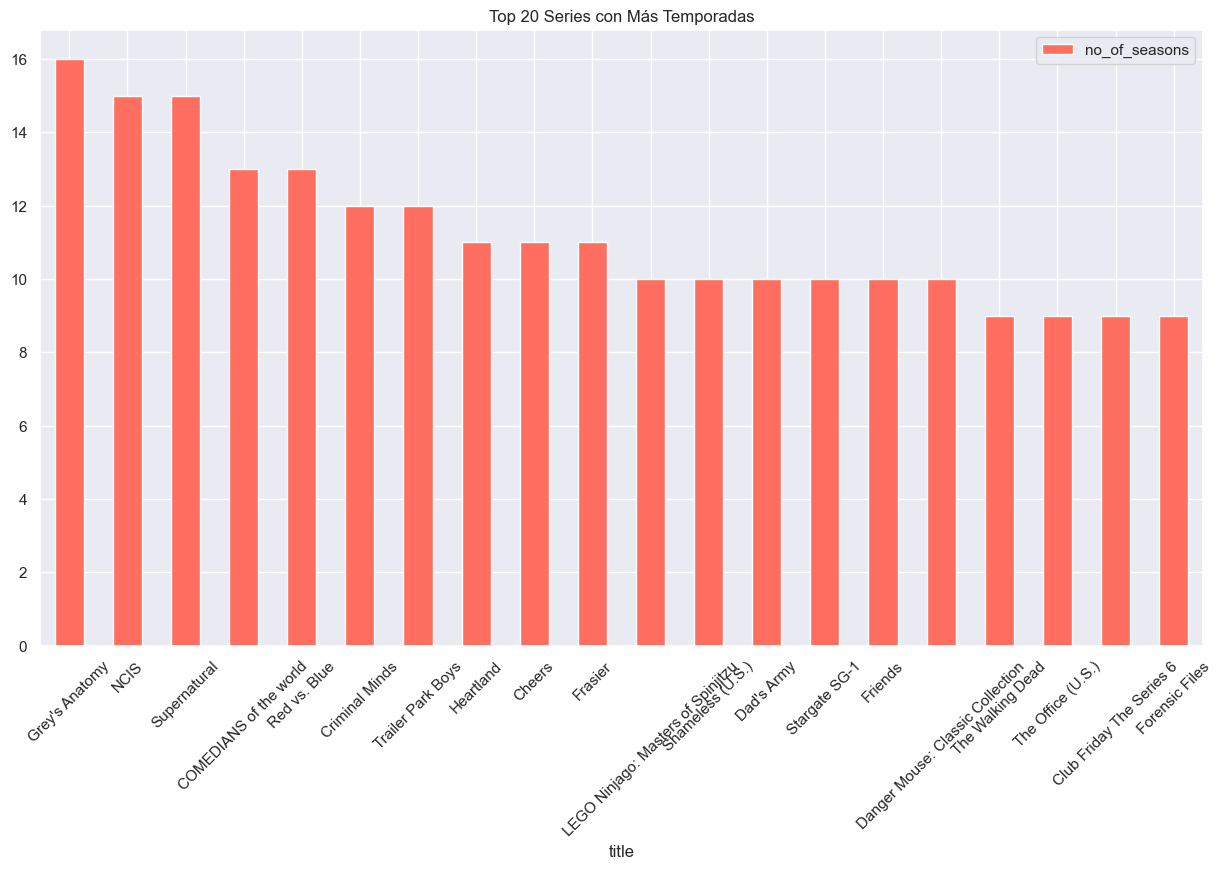

In [13]:
# Sacamos los títulos y la duración (número de temporadas) de las series
features = ['title', 'duration']
durations = netflix_shows[features]

# Limpiamos la columna de duración para obtener solo el número de temporadas
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

# Ordenamos las series por cantidad de temporadas (de mayor a menor)
t = ['title', 'no_of_seasons']
top = durations[t]
top = top.sort_values(by='no_of_seasons', ascending=False)

# Mostramos en gráfico las 20 series con más temporadas
top20 = top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='#FF6F61', figsize=(15, 8))  # color cambiado a un tono coral
plt.title("Top 20 Series con Más Temporadas")
plt.xticks(rotation=45)
plt.show()


### Sistema de recomendacion basado en contenido

Recomendador basado en la descripción de la trama (Recomendaciones basadas en contenido)

In [187]:
#Recomendador basado en descripción de la trama (Recomendaciones basadas en contenido)
netflix_dataset['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [20]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [21]:
#Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

In [25]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [26]:
get_recommendations('Welcome')

1761                  Dil Vil Pyaar Vyaar
6782                The Princess Weiyoung
866                               Bewafaa
3082                     It's Okay, Buddy
7245                           True Tunes
2472                             Gomorrah
302                      Acts of Violence
3859                          Magnificent
4938    Power Rangers Operation Overdrive
4692                        Our Godfather
Name: title, dtype: object

In [27]:
get_recommendations('Avengers: Infinity War')

6920                              The Talented Mr. Ripley
6270                                         The Darkness
400                                Aliens Ate My Homework
3589              LEGO Marvel Super Heroes: Black Panther
1338                       Chilling Adventures of Sabrina
7446                                              Vroomiz
4678                                            Orbiter 9
1448                                           Code Lyoko
7388                                             Vampires
3590    LEGO Marvel Super Heroes: Guardians of the Galaxy
Name: title, dtype: object

In [28]:
get_recommendations('Dil Dhadakne Do')

6464                     The House of Flowers
4603                                Old Money
377                                     Alelí
593                           Ascharyachakit!
5171                                  Results
1123                                 Budapest
3916                           Mansfield Park
5662        Sleepless Society: Bedtime Wishes
1192                         Can You Hear Me?
3583    LEGO Friends: The Power of Friendship
Name: title, dtype: object

In [29]:
#Filling null values with empty string.
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [31]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [32]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [33]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [34]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [37]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [38]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [39]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7058                               Thor: Ragnarok
5698                      Solo: A Star Wars Story
2700                                          Her
5118                                   Real Steel
5699    Solo: A Star Wars Story (Spanish Version)
959                                 Black Panther
3006                                     Inkheart
5632                                  Singularity
1741                   Di Renjie zhi Sidatianwang
2586                      Halo: The Fall of Reach
Name: title, dtype: object

In [40]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

7769    Zindagi Na Milegi Dobara
362                     AK vs AK
6878             The Sky Is Pink
1757              Dil Chahta Hai
3912                        Mann
4872                          PK
2571                      Haapus
886               Bhangra Paa Le
5954            Taare Zameen Par
1261             Chal Dhar Pakad
Name: title, dtype: object

### Adaptacion de segundo Data Netflix Movies and TV shows till 2025

In [16]:
# Cargar ambas bases de datos
netflix_movies = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
netflix_tv_shows = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

# Concatenarlas en un solo DataFrame
netflix_dataset2 = pd.concat([netflix_movies, netflix_tv_shows], ignore_index=True)

# Mostrar las primeras filas
netflix_dataset2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [47]:
netflix_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

In [188]:
#Identificar los valores únicos
dict = {}
for i in list(netflix_dataset2.columns):
    dict[i] = netflix_dataset2[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


In [189]:
# Valores faltantes
print('Table of missing values: ')
print(netflix_dataset2.isnull().sum())

Table of missing values: 
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


### Segundo Análisis Exploratorio de Datos
##### Descripción: Análisis de la distribución entre películas y series de TV en Netflix.

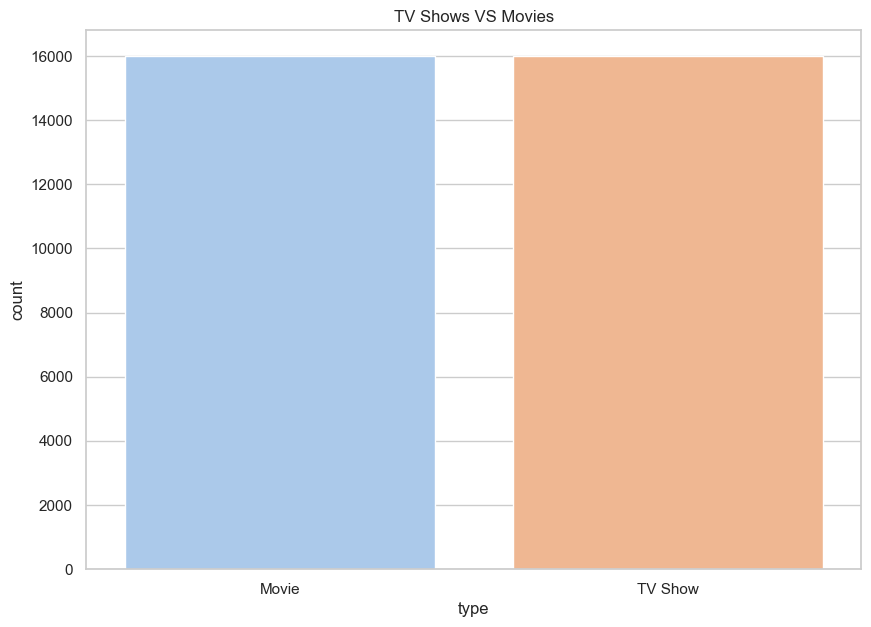

In [18]:
# Filtramos el dataset para separar las series y las películas
netflix_shows = netflix_dataset2[netflix_dataset2['type'] == 'TV Show']
netflix_movies = netflix_dataset2[netflix_dataset2['type'] == 'Movie']

# Creamos un gráfico para comparar cuántas películas y series hay en total
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_dataset2, palette="pastel")  # cambiamos la paleta a 'pastel'
ax.set_title("TV Shows VS Movies")
plt.show()


### Análisis Temporal: Mejor Mes para Lanzar Contenido
Descripción: Análisis de cuándo se agrega más contenido a Netflix para identificar oportunidades de lanzamiento.

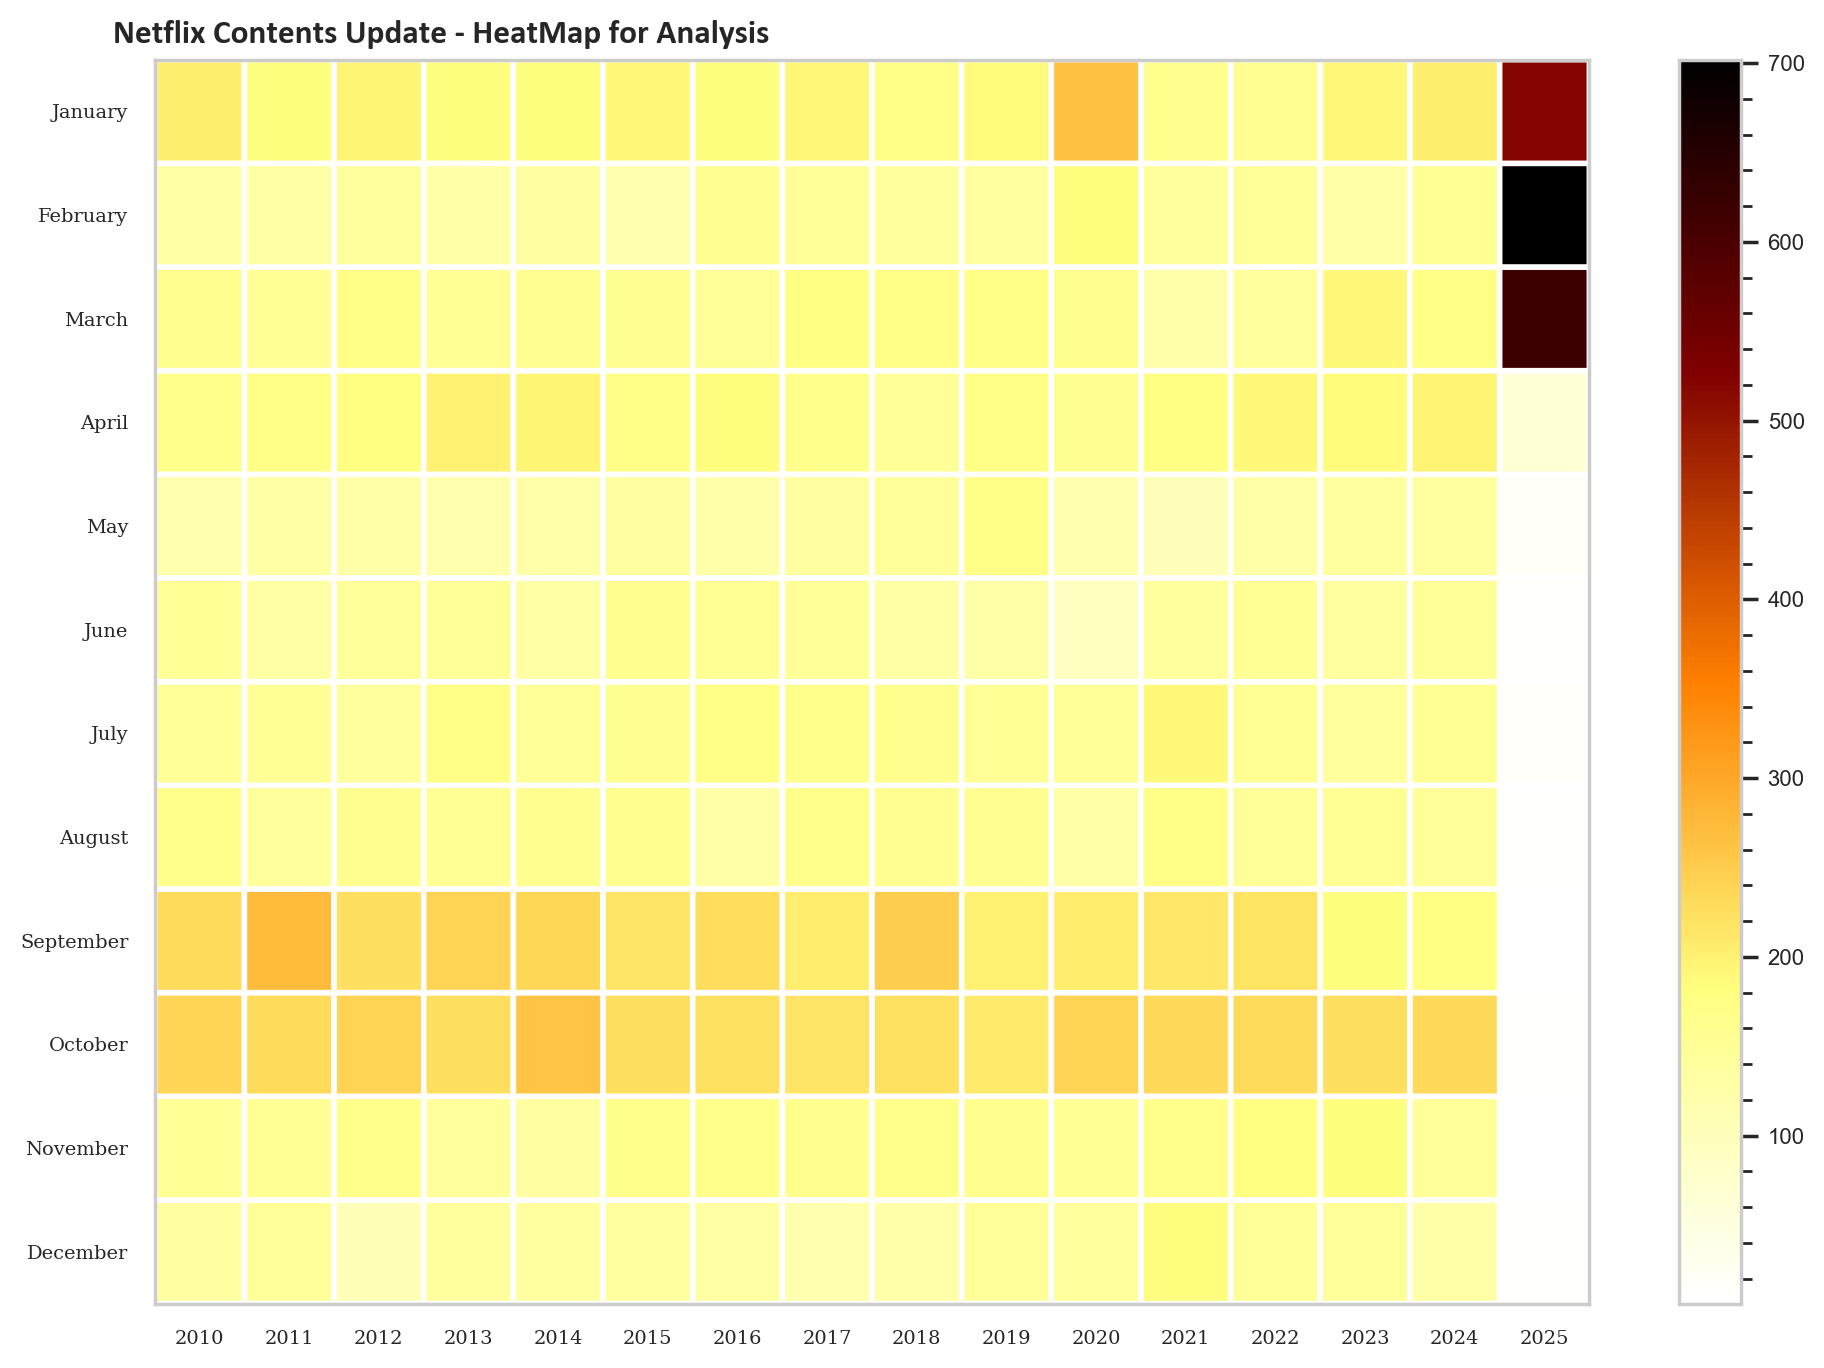

In [54]:
# Análisis temporal del contenido agregado por mes y año
netflix_date = netflix_dataset2[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'])

# Extraemos mes y año
netflix_date['year'] = netflix_date['date_added'].dt.year.astype(str)
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Orden de meses para el heatmap (de diciembre a enero)
month_order = ['December', 'November', 'October', 'September', 'August', 'July',
               'June', 'May', 'April', 'March', 'February', 'January']

# Agrupar y pivotear
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)

# Aseguramos que el orden de las columnas siga el orden de los meses
df = df.reindex(columns=month_order).T

# Graficar heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.02))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.tight_layout()
plt.show()

## Analisis de Ratings de peliculas

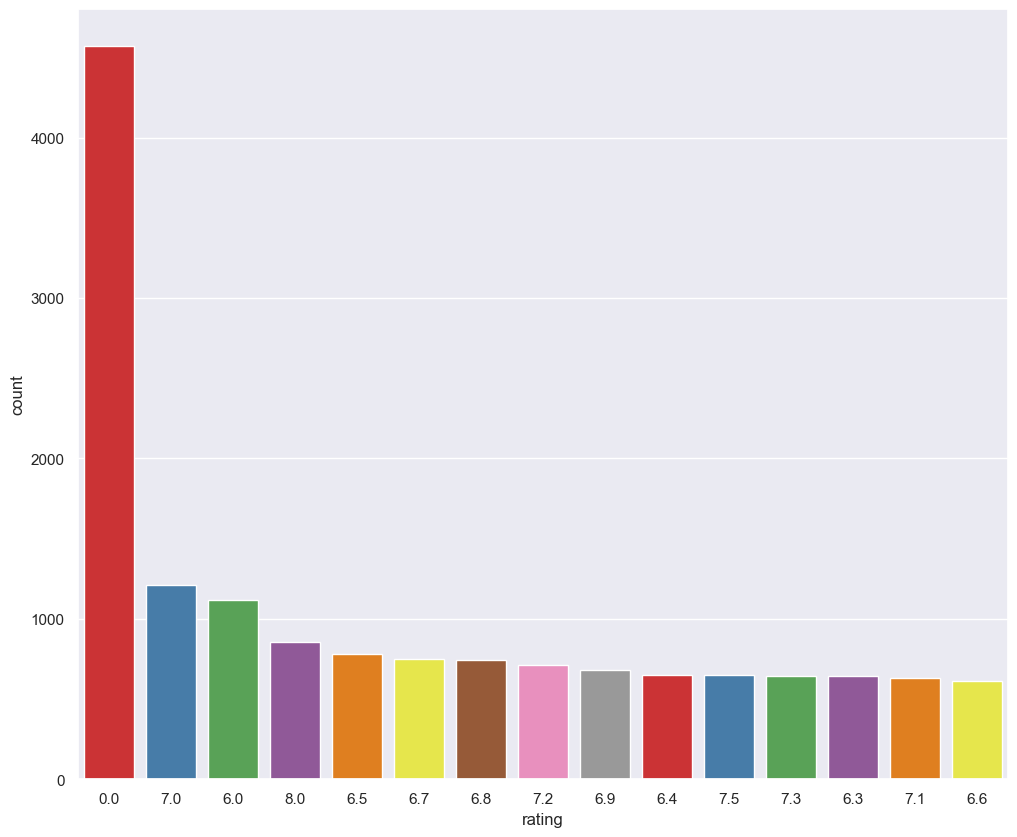

In [159]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset2, palette="Set1", order=netflix_dataset2['rating'].value_counts().index[0:15])

### Análisis de las calificaciones de IMDB para obtener las películas mejor valoradas en Netflix

In [20]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [69]:
# Crear y procesar el DataFrame
netflix_ratings = netflix_dataset2[['title', 'rating']].copy()
netflix_ratings.rename(columns={'title': 'Title', 'rating': 'Rating'}, inplace=True)
netflix_ratings.drop_duplicates(subset='Title', inplace=True)

# Mostrar con formato markdown
print("Netflix Titles and Ratings:")
print(netflix_ratings.head().to_markdown(index=False))

Netflix Titles and Ratings:
| Title                                        |   Rating |
|:---------------------------------------------|---------:|
| Shrek Forever After                          |    6.38  |
| Inception                                    |    8.369 |
| Harry Potter and the Deathly Hallows: Part 1 |    7.744 |
| Tangled                                      |    7.6   |
| How to Train Your Dragon                     |    7.8   |


In [23]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset2,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [22]:
top_titles = netflix_dataset2['title'].value_counts().head(10).index
top_data = netflix_dataset2[netflix_dataset2['title'].isin(top_titles)].dropna(subset=['country'])

In [24]:
import plotly.express as px

# Versión compacta del gráfico sunburst
fig = px.sunburst(
    top_data,
    path=['title', 'country'],
    color='title',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=2,
    branchvalues='total',
    width=600,  # Reducido de 1000 a 600
    height=500  # Reducido de 800 a 500
)

# Layout compacto
fig.update_layout(
    title_text='<b>Distribución por País</b>',
    title_font_size=18,
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),  # Márgenes más ajustados
    legend=dict(
        title='<b>Títulos</b>',
        orientation='v',
        yanchor='middle',
        y=0.5,
        xanchor='left',
        x=1.05,
        font=dict(size=10),  # Texto más pequeño
        bgcolor='rgba(240,240,240,0.5)'
    )
)

# Configuración optimizada para tamaño pequeño
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>%{value}',
    textinfo='label',
    textfont=dict(size=10),  # Texto más pequeño en el gráfico
    insidetextorientation='auto',  # Ajuste automático de texto
    marker=dict(line=dict(width=0.5))  # Líneas más delgadas
)

fig.show()

### Principales países que crean contenidos

In [186]:
#Top countries creating contents
country_count = netflix_dataset2['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States of America,7760
Japan,2587
China,2004
South Korea,1999
United Kingdom,1106
France,855
India,771
Canada,738
Germany,554


### Análisis anual

In [92]:
Last_fifteen_years = netflix_dataset2[netflix_dataset2['release_year']>2015 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
6000,426889,Movie,Le Clitoris,Lori Malépart-Traversy,Lori Malépart-Traversy,Canada,2016-06-18,2016,7.100,NaN,"Animation, Documentary",fr,"Women are lucky, they get to have the only org...",443.998,36,7.100,0.0,0.000000e+00
6001,271110,Movie,Captain America: Civil War,"Joe Russo, Anthony Russo","Chris Evans, Robert Downey Jr., Scarlett Johan...",United States of America,2016-04-27,2016,7.444,NaN,"Adventure, Action, Science Fiction",en,"Following the events of Age of Ultron, the col...",172.492,22932,7.444,250000000.0,1.155046e+09
6002,348893,Movie,Boyka: Undisputed IV,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",Bulgaria,2016-08-01,2016,7.200,NaN,"Action, Drama, Thriller",en,In the fourth installment of the fighting fran...,115.100,1347,7.200,0.0,4.133340e+05
6003,396535,Movie,Train to Busan,Yeon Sang-ho,"Gong Yoo, Kim Su-an, Jung Yu-mi, Don Lee, Choi...",South Korea,2016-07-20,2016,7.751,NaN,"Horror, Thriller, Action, Adventure",ko,When a zombie virus pushes Korea into a state ...,111.112,7645,7.751,8500000.0,8.754752e+07
6004,293660,Movie,Deadpool,Tim Miller,"Ryan Reynolds, Morena Baccarin, Ed Skrein, T.J...",United States of America,2016-02-09,2016,7.622,NaN,"Action, Adventure, Comedy",en,The origin story of former Special Forces oper...,106.641,31371,7.622,58000000.0,7.828373e+08


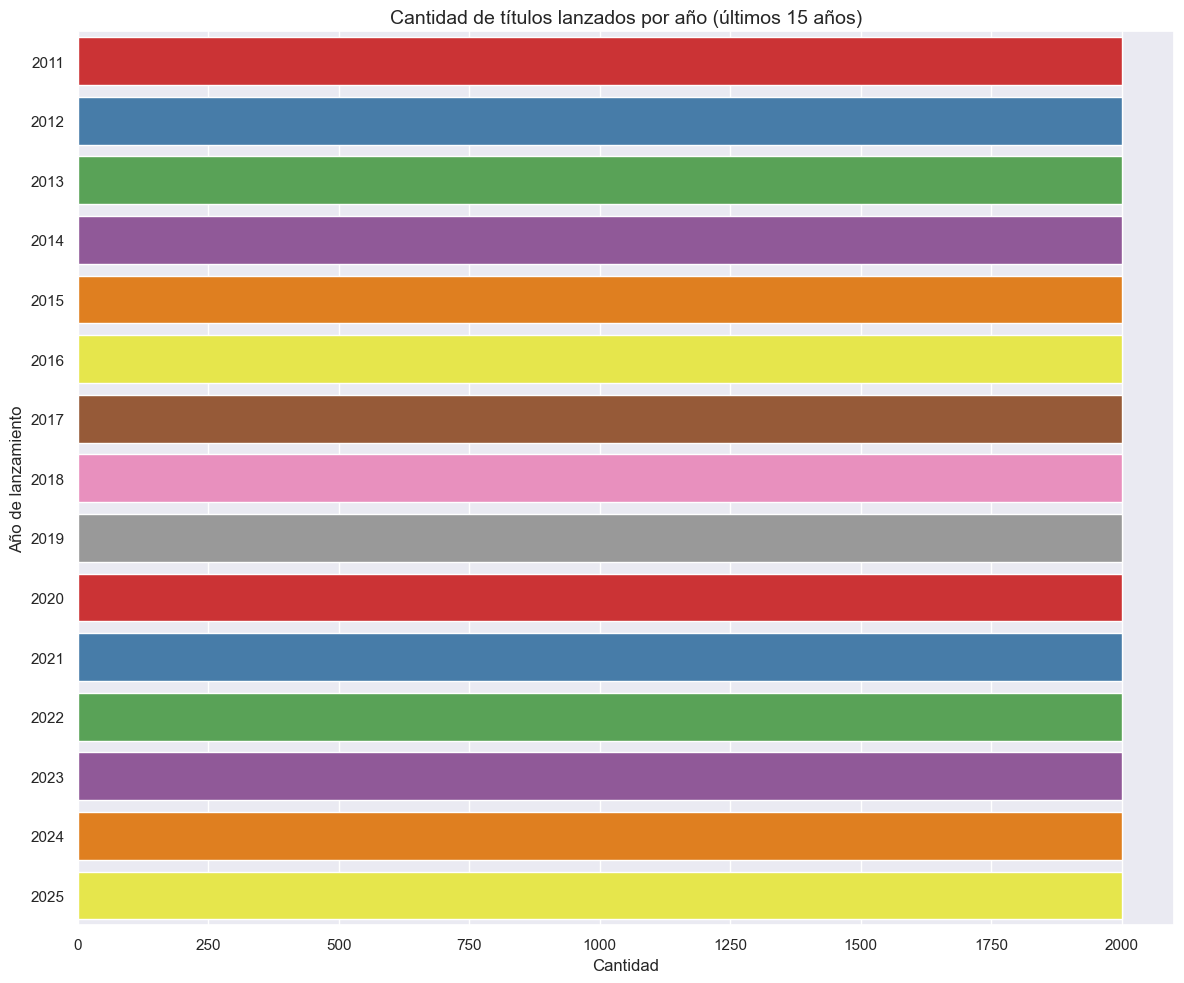

In [162]:
# Filtrar datos para últimos 15 años
current_year = netflix_dataset2['release_year'].max()
last_fifteen_years = netflix_dataset2[netflix_dataset2['release_year'] >= (current_year - 14)]

# Graficar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

ax = sns.countplot(
    y='release_year',
    data=last_fifteen_years,
    palette='Set1',
    order=last_fifteen_years['release_year'].value_counts().index[:15]
)

plt.title('Cantidad de títulos lanzados por año (últimos 15 años)', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Año de lanzamiento')
plt.tight_layout()
plt.show()


### Análisis de programas de televisión en Netflix

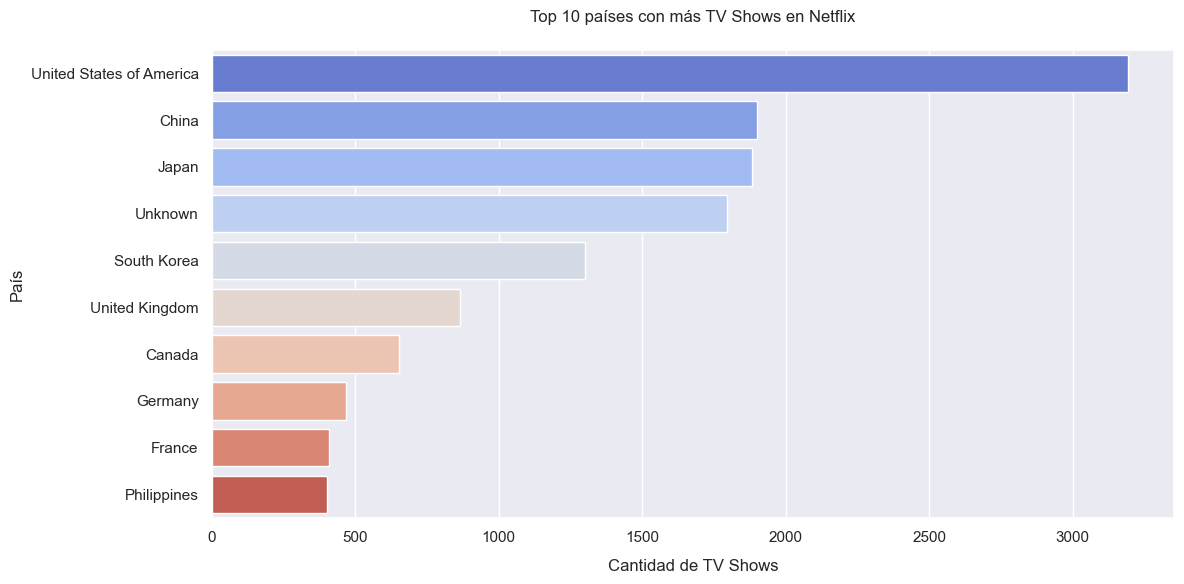

In [166]:
# Cargar ambas bases de datos
netflix_movies = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
netflix_tv_shows = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

# Concatenar los DataFrames
netflix_dataset2 = pd.concat([netflix_movies, netflix_tv_shows], ignore_index=True)

# Filtrar solo los TV Shows
netflix_shows = netflix_dataset2[netflix_dataset2['type'] == 'TV Show']

# Rellenar los valores nulos en la columna 'country' con 'Unknown'
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')

# Contar los países
countries = {}
for entry in netflix_shows['country']:
    # Separar países por coma y eliminar espacios extras
    country_list = [country.strip() for country in entry.split(',')]
    
    for country in country_list:
        countries[country] = countries.get(country, 0) + 1

# Convertir a DataFrame para graficar
country_df = pd.DataFrame(list(countries.items()), columns=['Country', 'Count'])
country_df = country_df.sort_values(by='Count', ascending=False)

paletas = [
    'viridis',         
    'plasma',          
    'magma',           
    'coolwarm',       
    'Spectral',       
    'rainbow',         
    'tab10',           
    'husl',          
    'Paired',          
    'Set3',            
    'mako',            
    'rocket'        
]

# Visualización de los 10 países con más TV Shows
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Country', 
           data=country_df.head(10), 
           palette=paletas[3])  # Cambia el índice para probar diferentes paletas
plt.title('Top 10 países con más TV Shows en Netflix', pad=20)
plt.xlabel('Cantidad de TV Shows', labelpad=10)
plt.ylabel('País')
plt.tight_layout()
plt.show()

### Analisis de duracion de de peliculas 

In [106]:
netflix_movies['duration'] = netflix_movies['duration'].astype(str).str.replace(' min', '').astype(int)
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

Series([], Name: duration, dtype: int32)

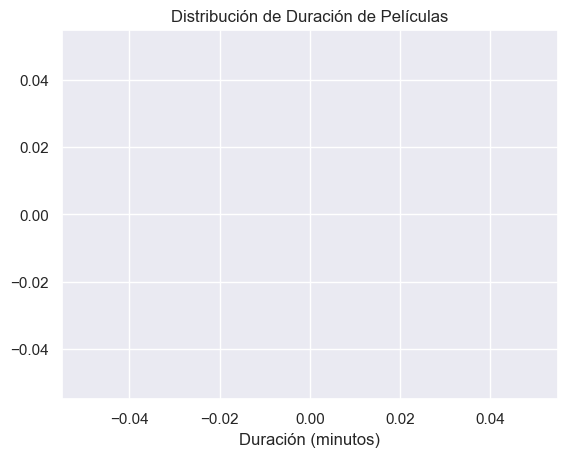

In [107]:
# Crear gráfico de densidad para visualizar distribución de duraciones
sns.set(style="darkgrid")
ax = sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title("Distribución de Duración de Películas")
plt.xlabel("Duración (minutos)")
plt.show()

### Análisis de la duración de los programas de televisión

In [108]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [109]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [110]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

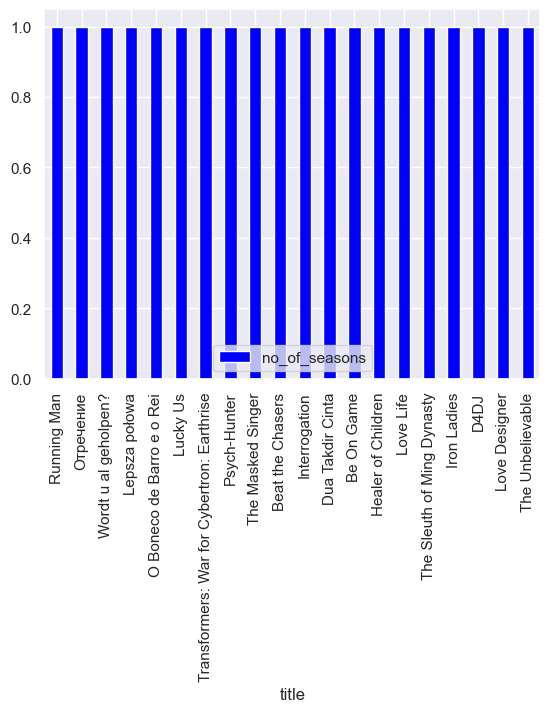

In [111]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

### Sistema de recomendación basado en contenido para el segundo DataSet

In [112]:
netflix_dataset2['description'].head()

0    A bored and domesticated Shrek pacts with deal...
1    Cobb, a skilled thief who commits corporate es...
2    Harry, Ron and Hermione walk away from their l...
3    Feisty teenager Rapunzel, who has long and mag...
4    As the son of a Viking leader on the cusp of m...
Name: description, dtype: object

In [190]:
# Importar TfIdfVectorizer de scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Definir un objeto Vectorizador TF-IDF. Elimina todas las stop words en inglés como 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

# Reemplazar valores NaN con strings vacíos
netflix_dataset2['description'] = netflix_dataset2['description'].fillna('')

# Construir la matriz TF-IDF aplicando fit y transform a los datos
tfidf_matrix = tfidf.fit_transform(netflix_dataset2['description'])

# Mostrar la forma/dimensiones de la matriz tfidf_matrix
tfidf_matrix.shape

(32000, 54565)

In [132]:
# Importar la función linear_kernel de scikit-learn
from sklearn.metrics.pairwise import linear_kernel

# Calcular la matriz de similitud coseno
# (Compara qué tan similares son las descripciones entre sí)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [133]:
# Construir un mapeo inverso de índices y títulos de películas/series
indices = pd.Series(netflix_dataset2.index, index=netflix_dataset2['title']).drop_duplicates()

Función que toma el título de la película como entrada y genera la mayoría de las películas similares

In [191]:
# Función que recibe un título de película/serie y devuelve recomendaciones similares
def get_recommendations(title, cosine_sim=cosine_sim):
    # Obtener el índice de la película/serie que coincide con el título
    idx = indices[title]
    
    # Obtener los puntajes de similitud de todas las películas/series con respecto a la elegida
    # enumerate agrega el índice a cada valor de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordenar las películas/series según sus puntajes de similitud (de mayor a menor)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Seleccionar los 10 puntajes más similares (excluyendo la primera que es la propia película)
    sim_scores = sim_scores[1:11]
    
    # Obtener los índices de las películas/series más similares
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver los títulos de las 10 películas/series más similares
    return netflix_dataset2['title'].iloc[movie_indices]

In [137]:
get_recommendations('Inception')

583      Inception: The Cobol Job
3148                    New World
11662                  Homunculus
3321             The Monkey's Paw
7210                     Altitude
30232          Lumuhod Ka Sa Lupa
19692                    Shen Tou
21932                    Mindfuck
29566                 Rabbit Hole
18998                     La fuga
Name: title, dtype: object

In [138]:
get_recommendations('Avengers: Infinity War')

9001                                     Avengers: Endgame
7413     LEGO Marvel Super Heroes: Guardians of the Gal...
19114                                    Marvel's Avengers
14298             LEGO Marvel Avengers: Mission Demolition
8963                             Avengers Grimm: Time Wars
13378                       LEGO Marvel Avengers: Code Red
20652                       Marvel Disk Wars: The Avengers
25758                                              Pandora
3370                      Phineas and Ferb: Mission Marvel
16135               The Avengers: Earth's Mightiest Heroes
Name: title, dtype: object

In [139]:
get_recommendations('Dil Dhadakne Do')

3567                                  Le Week-End
6458                              The Family Fang
8746                   There's No Place Like Home
5762                             One Crazy Cruise
3868                                Family United
8672                         What Keeps You Alive
13961    My Brother-in-law Is Looking For Me Only
9283                    My Sister-in-law's Secret
24964                         Frankenstein Family
21070                               Iron Lady Cha
Name: title, dtype: object

### Filtrado basado en contenido según múltiples métricas

#### Filtrado de contenido basado en los siguientes factores:
#### Título
#### Reparto
#### Director
#### Incluido en
#### Argumento

In [140]:
#Rellenar valores nulos con una cadena vacía.
filledna=netflix_dataset2.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [141]:
#Limpieza de datos: convertir todas las palabras en minúsculas
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [144]:
#Identificar las características sobre las que se filtrará el modelo.
features=['title','director','cast','description']
filledna=filledna[features]

In [145]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,description
0,shrekforeverafter,mikemitchell,"mikemyers,eddiemurphy,camerondiaz,antoniobande...",aboredanddomesticatedshrekpactswithdeal-makerr...
1,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,kenwatana...","cobb,askilledthiefwhocommitscorporateespionage..."
2,harrypotterandthedeathlyhallows:part1,davidyates,"danielradcliffe,emmawatson,rupertgrint,tobyjon...","harry,ronandhermionewalkawayfromtheirlastyeara..."
3,tangled,"byronhoward,nathangreno","mandymoore,zacharylevi,donnamurphy,ronperlman,...","feistyteenagerrapunzel,whohaslongandmagicalhai..."
4,howtotrainyourdragon,"chrissanders,deandeblois","jaybaruchel,gerardbutler,craigferguson,america...","asthesonofavikingleaderonthecuspofmanhood,shyh..."


In [146]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] +' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [151]:
# Importa CountVectorizer y crea la matriz de conteo
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [152]:
# Calcule la matriz de similitud de coseno basándose en count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [154]:
# Restablecer el índice de nuestro DataFrame principal y construir un mapeo inverso como antes
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [155]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset2['title'].iloc[movie_indices]

In [156]:
get_recommendations_new('Shrek Forever After', cosine_sim2)

203       Donkey's Christmas Shrektacular
52                       Scared Shrekless
1977              Shrek: Once Upon a Time
2046     Puss in Boots: The Three Diablos
23863                       The Gong Show
1157                              Haywire
3116                        The Counselor
3718                      The Unbelievers
1099                          Bad Teacher
2178                               Gambit
Name: title, dtype: object

In [157]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

582      Band Baaja Baaraat
9985              Gully Boy
5325        Bajirao Mastani
4699                 Gunday
3775                 Race 2
14945                 Tiger
2460       Jab Tak Hai Jaan
3346               Krrish 3
8906                 Simmba
1318                  Don 2
Name: title, dtype: object

In [158]:
get_recommendations_new('Avengers: Infinity War')

9001                                     Avengers: Endgame
7413     LEGO Marvel Super Heroes: Guardians of the Gal...
19114                                    Marvel's Avengers
14298             LEGO Marvel Avengers: Mission Demolition
8963                             Avengers Grimm: Time Wars
13378                       LEGO Marvel Avengers: Code Red
20652                       Marvel Disk Wars: The Avengers
25758                                              Pandora
3370                      Phineas and Ferb: Mission Marvel
16135               The Avengers: Earth's Mightiest Heroes
Name: title, dtype: object